In [1]:
"""
Fits a quadratic function to the data. 

Reports fit parameter covariance, etc.

Follows example from: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
"""

'\nFits a quadratic function to the data. \n\nReports fit parameter covariance, etc.\n\nFollows example from: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html\n'

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit
from matplotlib.mlab import griddata

In [3]:
# Read Data
dfname = 'output2.csv'
raw_data = np.genfromtxt(dfname, delimiter=',', skip_header=1)
# Each element of data is a row from the csv file, so convert to columns
data = np.transpose(raw_data)
# data[0] = Blocker factors
# data[1] = Reimers factors
# data[2] = CO WD Mass

In [4]:
ivars = data[0:2] # independent variables
dvars = data[2]   # dependent variable

In [5]:
pnames = ['cx2', 'cy2', 'cxy', 'cx', 'cy', 'c0']

In [6]:
# Define fitting function
def quadratic_2d(z, cx2, cy2, cxy, cx, cy, c0):
    x = z[0]
    y = z[1]
    f = c0 + cx * x + cy * y + cxy * x * y + cx2 * x**2 + cy2 * y**2
    return f

In [7]:
# Fit quadratic_2d to data
popt, pcov = curve_fit(quadratic_2d, ivars, dvars)

In [8]:
popt

array([ 5.76875669, -0.20601277,  0.46457352, -1.13227515,  0.13778614,
        0.55956725])

In [9]:
pcov

array([[  3.45449816e-01,   6.69013176e-04,  -6.20771591e-03,
         -3.22553877e-02,  -3.87529187e-04,   5.82322159e-04],
       [  6.69013176e-04,   2.94991103e-04,  -5.16965412e-05,
         -2.74599872e-05,  -3.56020014e-04,   9.77414315e-05],
       [ -6.20771591e-03,  -5.16965412e-05,   6.86990897e-03,
         -3.48151173e-03,  -2.81451563e-04,   1.76128240e-04],
       [ -3.22553877e-02,  -2.74599872e-05,  -3.48151173e-03,
          5.67815461e-03,   1.93663448e-04,  -1.72863251e-04],
       [ -3.87529187e-04,  -3.56020014e-04,  -2.81451563e-04,
          1.93663448e-04,   4.52975636e-04,  -1.31043671e-04],
       [  5.82322159e-04,   9.77414315e-05,   1.76128240e-04,
         -1.72863251e-04,  -1.31043671e-04,   4.15766914e-05]])

For data with unknown uncertainties (e.g. CO WD Mass with no uncertainty),
the covariance matrix is computed by using a variance calculated as the variance 
of the residuals between the data and the best fit. It contains information
about the statistical error of the fit due to scatter in the supplied data.

In [10]:
# Get standard deviation on fit parameters
pstd = np.sqrt(np.diag(pcov))

In [11]:
pstd

array([ 0.58774979,  0.01717531,  0.08288491,  0.07535353,  0.02128322,
        0.006448  ])

In [12]:
# Print the fit parameters with 1 std errors
for n, v, s in zip(pnames, popt, pstd):
    print('{} = {} +/- {}'.format(n, v, s))

cx2 = 5.768756688622785 +/- 0.5877497899192593
cy2 = -0.20601276511812017 +/- 0.017175305033086695
cxy = 0.4645735171653338 +/- 0.08288491403686742
cx = -1.1322751540276104 +/- 0.07535353083263574
cy = 0.13778613804801929 +/- 0.021283224287336235
c0 = 0.559567248037217 +/- 0.00644799902582934


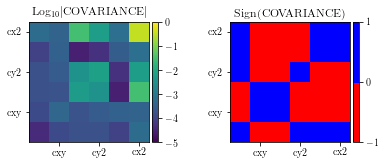

In [13]:
# Plot the covariance matrix to see correlations between the fit parameters
labels = ['','cx2', 'cy2', 'cxy', 'cx', 'cy', 'c0']

fig = plt.figure()

plt.rc('text',usetex=True)
plt.rc('font',family='serif')

ax1 = fig.add_subplot(121)
divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.05)
cmap1 = mpl.cm.get_cmap('viridis')
bounds1 = [-5,-4,-3,-2,-1,0]
norm1 = mpl.colors.Normalize(vmin=np.amin(bounds1),vmax=np.amax(bounds1))
img1 = ax1.imshow(np.log10(np.absolute(pcov)), interpolation='nearest', cmap=cmap1, norm=norm1)
ax1.invert_xaxis()
plt.colorbar(img1, cmap=cmap1, cax=cax1, ticks=bounds1, norm=norm1)
ax1.set_title('$\mathrm{Log_{10} |COVARIANCE|}$')
ax1.set_yticklabels(labels)
ax1.set_xticklabels(labels)

ax2 = fig.add_subplot(122)
divider = make_axes_locatable(ax2)
cax2 = divider.append_axes('right', size='5%', pad=0.05)
cmap2 = mpl.colors.ListedColormap(['red','blue'])
bounds2=[-1,0,1]
norm2 = mpl.colors.BoundaryNorm(bounds2, cmap2.N)
img2 = ax2.imshow(np.sign(pcov), interpolation='nearest', cmap=cmap2, norm=norm2)
ax2.invert_xaxis()
plt.colorbar(img2, cmap=cmap2, norm=norm2, boundaries=bounds2, ticks=bounds2, cax=cax2)
ax2.set_title('$\mathrm{Sign(COVARIANCE)}$')
ax2.set_yticklabels(labels)
ax2.set_xticklabels(labels)

plt.tight_layout(pad=3)

fig.savefig('covariance.eps',format='eps',dpi=1000)

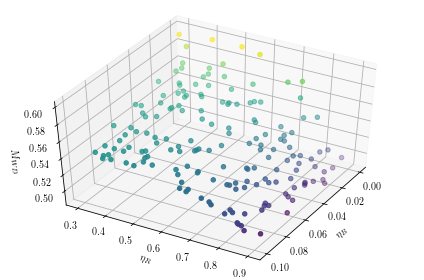

In [14]:
# Plot data
plt.clf()
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
splot = ax1.scatter(data[0], data[1], data[2], c=data[2], cmap='viridis')
ax1.view_init(45, 30)
ax1.set_xlabel('$\\eta_B$')
ax1.set_ylabel('$\\eta_R$')
ax1.set_zlabel('$M_{WD}$')
plt.tight_layout()

fig.savefig('scat.eps',format='eps',dpi=1000)

/Users/melissahoffman1/anaconda/lib/python3.6/site-packages/matplotlib/colors.py:494: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


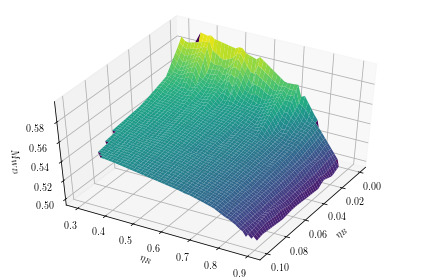

In [15]:
# Plot data
xi = np.linspace(min(data[0]),max(data[0]))
yi = np.linspace(min(data[1]),max(data[1]))
X, Y = np.meshgrid(xi,yi)
Z = griddata(data[0],data[1],data[2],xi,yi,interp='linear')
plt.clf()
fig = plt.figure()
ax1 = fig.gca(projection='3d')
suplot = ax1.plot_surface(X, Y, Z,rstride=1,cstride=1, cmap=plt.cm.viridis,vmax=max(data[2]),vmin=min(data[2]),linewidth=0.4)
ax1.view_init(45, 30)
ax1.set_xlabel('$\\eta_B$')
ax1.set_ylabel('$\\eta_R$')
ax1.set_zlabel('$M_{WD}$')
plt.tight_layout()

#fig.savefig('surf3.eps',format='eps',dpi=1000)

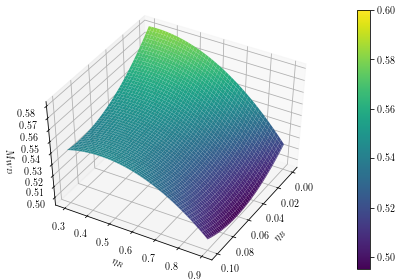

In [16]:
# Plot fit
plt.clf()
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
xvec = np.linspace(np.amin(data[0]), np.amax(data[0]), num=2*len(data[0]))
yvec = np.linspace(np.amin(data[1]), np.amax(data[1]), num=2*len(data[1]))

x, y = np.meshgrid(xvec, yvec)
zfit = quadratic_2d([x,y], *popt)
vals = []
for i in zfit:
    for j in i:
        vals.append(j)
surf = ax1.plot_surface(x, y, zfit, cmap=mpl.cm.viridis, vmax=round(max(vals),1), linewidth=0.4, alpha=1.0)
ax1.view_init(45, 30)
fig.colorbar(surf)
ax1.set_xlabel('$\\eta_B$')
ax1.set_ylabel('$\\eta_R$')
ax1.set_zlabel('$M_{WD}$')
plt.tight_layout()

#fig.savefig('surf.eps',format='eps',dpi=1000)

In [17]:
# Get fit residuals
mfit = quadratic_2d(data[0:2], *popt)
resd = data[2] - mfit

print('min resd: {}\n'.format(np.amin(resd)))
print('max resd: {}\n'.format(np.amax(resd)))

# Sum of squares 
avgm = np.mean(data[2])
sqrs = data[2] - avgm
tssq = np.sum(sqrs**2)
print('total sum of squares is: {}\n'.format(tssq))

# Sum of squared residuals
ssrd = np.sum(resd**2)
print('sum of squared residuals: {}\n'.format(ssrd))
print('sqrt sum of squared residuals: {}\n'.format(np.sqrt(ssrd)))

# Sum of squared (residual/data)
ssrn = np.sum((resd/data[2])**2)
print('sum of squared (residual/data): {}\n'.format(ssrn))
print('sqrt sum of squared (residual/data): {}\n'.format(np.sqrt(ssrn)))

# Calculate R^2 = 1 - ssrd/tssq
FUV = ssrd/tssq
R2 = 1. - FUV
print('R-squared value is: {}\n'.format(R2))

min resd: -0.014839624120086436

max resd: 0.024137107539305425

total sum of squares is: 0.0781395187938031

sum of squared residuals: 0.0057913168400311275

sqrt sum of squared residuals: 0.07610070196805761

sum of squared (residual/data): 0.018950841719421622

sqrt sum of squared (residual/data): 0.13766205620802568

R-squared value is: 0.9258849180359886



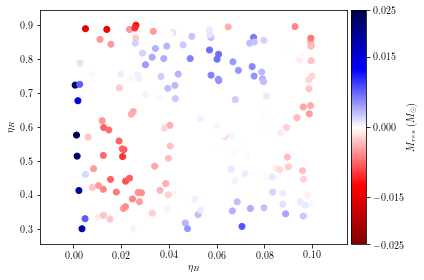

In [18]:
# Plot Residuals on the eta domain
fig = plt.figure()
ax1 = fig.add_subplot(111)
divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.05)
cmap1 = mpl.cm.get_cmap('seismic_r')
bounds1 = [-0.025,-0.015,0,0.015,0.025]
norm1 = mpl.colors.Normalize(vmin=np.amin(bounds1),vmax=np.amax(bounds1))
img1 = ax1.scatter(data[0], data[1], c=resd, cmap=cmap1, norm=norm1)
#ax1.invert_xaxis()
plt.colorbar(img1, cmap=cmap1, cax=cax1, ticks=bounds1, norm=norm1, label='$M_{res}~(M_{\odot})$')
#ax1.set_title('$\mathrm{Log_{10} |COVARIANCE|}$')
ax1.set_ylabel('$\eta_R$')
ax1.set_xlabel('$\eta_B$')
plt.tight_layout()


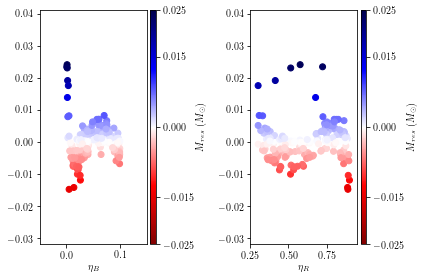

In [19]:
# Plot projected residuals
fig = plt.figure()

ax1 = fig.add_subplot(121)
divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.05)
cmap1 = mpl.cm.get_cmap('seismic_r')
bounds1 = [-0.025,-0.015,0,0.015,0.025]
norm1 = mpl.colors.Normalize(vmin=np.amin(bounds1),vmax=np.amax(bounds1))
img1 = ax1.scatter(data[0], resd, c=resd, cmap=cmap1, norm=norm1)
ax1.set_xlim([-0.05, 0.15])
#ax1.invert_xaxis()
plt.colorbar(img1, cmap=cmap1, cax=cax1, ticks=bounds1, norm=norm1, label='$M_{res}~(M_{\odot})$')
#ax1.set_title('$\mathrm{Log_{10} |COVARIANCE|}$')
ax1.set_xlabel('$\eta_B$')

ax2 = fig.add_subplot(122)
divider = make_axes_locatable(ax2)
cax2 = divider.append_axes('right', size='5%', pad=0.05)
cmap2 = mpl.cm.get_cmap('seismic_r')
bounds2 = [-0.025,-0.015,0,0.015,0.025]
norm2 = mpl.colors.Normalize(vmin=np.amin(bounds2),vmax=np.amax(bounds2))
img2 = ax2.scatter(data[1], resd, c=resd, cmap=cmap2, norm=norm2)
ax2.set_xlim([0.25, 0.95])
#ax2.invert_xaxis()
plt.colorbar(img2, cmap=cmap2, cax=cax2, ticks=bounds2, norm=norm2, label='$M_{res}~(M_{\odot})$')
#ax2.set_title('$\mathrm{Log_{10} |COVARIANCE|}$')
ax2.set_xlabel('$\eta_R$')

plt.tight_layout()

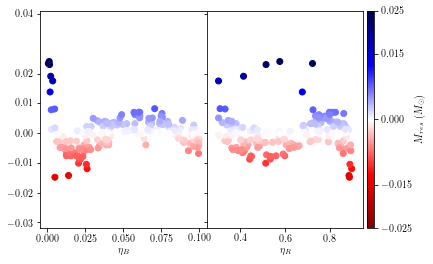

In [20]:
# Plot projected residuals
fig, (ax1,ax2) = plt.subplots(1,2, sharey=True)

cmap1 = mpl.cm.get_cmap('seismic_r')
bounds1 = [-0.025,-0.015,0,0.015,0.025]
norm1 = mpl.colors.Normalize(vmin=np.amin(bounds1),vmax=np.amax(bounds1))
img1 = ax1.scatter(data[0], resd, c=resd, cmap=cmap1, norm=norm1)
ax1.set_xlim([-0.05, 0.15])
#plt.colorbar(img1, cmap=cmap1, cax=cax1, ticks=bounds1, norm=norm1, label='$M_{res}~(M_{\odot})$')
ax1.set_xlabel('$\eta_B$')

#ax2 = fig.add_subplot(122)
cmap2 = mpl.cm.get_cmap('seismic_r')
bounds2 = [-0.025,-0.015,0,0.015,0.025]
norm2 = mpl.colors.Normalize(vmin=np.amin(bounds2),vmax=np.amax(bounds2))
img2 = ax2.scatter(data[1], resd, c=resd, cmap=cmap2, norm=norm2)
ax2.set_xlim([0.25, 0.95])
ax2.set_xlabel('$\eta_R$')
plt.subplots_adjust(wspace=0)
yticks = ax1.yaxis.get_major_ticks()
yticks2 = ax2.yaxis.get_major_ticks()
yticks2[7].set_visible(False)
yticks[7].set_visible(False)
yticks[0].set_visible(False)

ax1.set_xlim([-0.005,0.105])
divider = make_axes_locatable(ax2)
cax2 = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(img2, cmap=cmap2, cax=cax2, ticks=bounds2, norm=norm2, label='$M_{res}~(M_{\odot})$')

fig.savefig('residuals.eps',format='eps',dpi=1000)



In [21]:
def plane_fit(x,y):
    if (0.0651<=x<=0.1 and 0.3<=y<=0.9):
        pt = 0.584493602188 - 0.108879294014*x - 0.0724648348029*y
        #print("Fits plane 1")
    if (0.0029<=x<=0.0351 and 0.3<=y<=0.6614):
        pt = 0.609623735556 - 0.987491300053*x - 0.0723353631521*y
        #print("Fits plane 2")
    if (0.0351<=x<=0.0569 and 0.3<=y<=0.6614):
        pt = 0.580284452291 - 0.258712939179*x - 0.0476576775978*y
        #print("Fits plane 3")
    if (0.0007<=x<=0.0029 and 0.3<=y<=0.6614):
        pt = 0.704009234301 - 19.4175154783*x - 0.148977676659*y
        #print("Fits plane 4")
    if (0.0007<=x<=0.0569 and 0.6614<=y<=0.9):
        pt = 0.720215522038 - 0.400165601901*x - 0.233640619864*y
        #print("Fits plane 5")
    if (0.0569<=x<=0.0651 and 0.3<=y<=0.9):
        pt = 0.676169866029 - 1.05797356368*x - 0.122206877263*y
        #print("Fits plane 6")
    return pt 

In [22]:
# Compute values of final mass using linear planes fit
tilemass = []
for i in range(len(data[0])):
    x = data[0][i]
    y = data[1][i]
    mass = plane_fit(data[0][i],data[1][i])
    tilemass.append(mass)
#tilemass = np.asarray(tilemass)
print(type(tilemass))

<class 'list'>


In [23]:
# Compute residuals 
# Get fit residuals
mfit = tilemass
resdl = data[2] - mfit

print('min resd: {}\n'.format(np.amin(resdl)))
print('max resd: {}\n'.format(np.amax(resdl)))

# Sum of squares 
avgm = np.mean(data[2])
sqrs = data[2] - avgm
tssq = np.sum(sqrs**2)
print('total sum of squares is: {}\n'.format(tssq))

# Sum of squared residuals
ssrd = np.sum(resdl**2)
print('sum of squared residuals: {}\n'.format(ssrd))
print('sqrt sum of squared residuals: {}\n'.format(np.sqrt(ssrd)))

# Sum of squared (residual/data)
ssrn = np.sum((resdl/data[2])**2)
print('sum of squared (residual/data): {}\n'.format(ssrn))
print('sqrt sum of squared (residual/data): {}\n'.format(np.sqrt(ssrn)))

# Calculate R^2 = 1 - ssrd/tssq
FUV = ssrd/tssq
R2 = 1. - FUV
print('R-squared value is: {}\n'.format(R2))

print(type(resd))
print(type(resdl))

min resd: -0.014430332216715358

max resd: 0.023409808830302303

total sum of squares is: 0.0781395187938031

sum of squared residuals: 0.003607611880889333

sqrt sum of squared residuals: 0.06006339884563088

sum of squared (residual/data): 0.012749242360232641

sqrt sum of squared (residual/data): 0.11291254297124231

R-squared value is: 0.9538311479699637

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


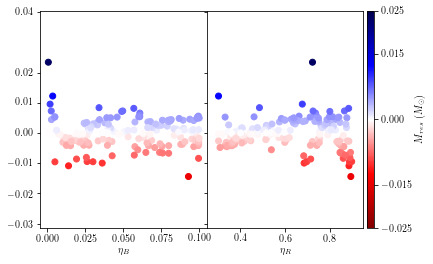

In [24]:
# Plot projected residuals
fig, (ax1,ax2) = plt.subplots(1,2, sharey=True)

cmap1 = mpl.cm.get_cmap('seismic_r')
bounds1 = [-0.025,-0.015,0,0.015,0.025]
norm1 = mpl.colors.Normalize(vmin=np.amin(bounds1),vmax=np.amax(bounds1))
img1 = ax1.scatter(data[0], resdl, c=resdl, cmap=cmap1, norm=norm1)
ax1.set_xlim([-0.05, 0.15])
#plt.colorbar(img1, cmap=cmap1, cax=cax1, ticks=bounds1, norm=norm1, label='$M_{res}~(M_{\odot})$')
ax1.set_xlabel('$\eta_B$')

#ax2 = fig.add_subplot(122)
cmap2 = mpl.cm.get_cmap('seismic_r')
bounds2 = [-0.025,-0.015,0,0.015,0.025]
norm2 = mpl.colors.Normalize(vmin=np.amin(bounds2),vmax=np.amax(bounds2))
img2 = ax2.scatter(data[1], resdl, c=resdl, cmap=cmap2, norm=norm2)
ax2.set_xlim([0.25, 0.95])
ax2.set_xlabel('$\eta_R$')
plt.subplots_adjust(wspace=0)
yticks = ax1.yaxis.get_major_ticks()
yticks2 = ax2.yaxis.get_major_ticks()
yticks2[7].set_visible(False)
yticks[7].set_visible(False)
yticks[0].set_visible(False)

ax1.set_xlim([-0.005,0.105])
divider = make_axes_locatable(ax2)
cax2 = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(img2, cmap=cmap2, cax=cax2, ticks=bounds2, norm=norm2, label='$M_{res}~(M_{\odot})$')

fig.savefig('residuals_tile.eps',format='eps',dpi=1000)



In [25]:
def Linear_fit(z,cx,cy,c0):
    x = z[0]
    y = z[1]
    f = c0 + cx * x + cy * y
    return f

In [26]:
popt2, pcov2 = curve_fit(Linear_fit, ivars, dvars)

In [27]:
popt2

array([-0.24403912, -0.09161475,  0.60535586])

In [30]:
# Get fit residuals
mfit = Linear_fit(data[0:2], *popt2)
resdd = data[2] - mfit

print('min resd: {}\n'.format(np.amin(resdd)))
print('max resd: {}\n'.format(np.amax(resdd)))

# Sum of squares 
avgm = np.mean(data[2])
sqrs = data[2] - avgm
tssq = np.sum(sqrs**2)
print('total sum of squares is: {}\n'.format(tssq))

# Sum of squared residuals
ssrd = np.sum(resdd**2)
print('sum of squared residuals: {}\n'.format(ssrd))
print('sqrt sum of squared residuals: {}\n'.format(np.sqrt(ssrd)))

# Sum of squared (residual/data)
ssrn = np.sum((resdd/data[2])**2)
print('sum of squared (residual/data): {}\n'.format(ssrn))
print('sqrt sum of squared (residual/data): {}\n'.format(np.sqrt(ssrn)))

# Calculate R^2 = 1 - ssrd/tssq
FUV = ssrd/tssq
R2 = 1. - FUV
print('R-squared value is: {}\n'.format(R2))

min resd: -0.026377980061867756

max resd: 0.04135506038353742

total sum of squares is: 0.0781395187938031

sum of squared residuals: 0.016448223328834825

sqrt sum of squared residuals: 0.12825062701146855

sum of squared (residual/data): 0.055156422078468825

sqrt sum of squared (residual/data): 0.23485404420292366

R-squared value is: 0.789501860483184



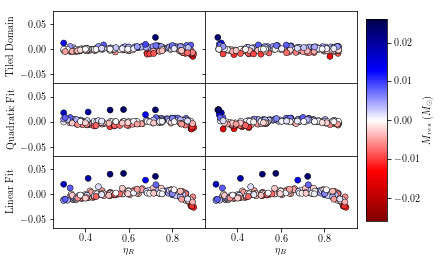

In [29]:
# Plot projected residuals
fig, ax = plt.subplots(3,2, sharey=True)

cmap1 = mpl.cm.get_cmap('seismic_r')
bounds1 = [-0.026,-0.015,0,0.015,0.026]
norm1 = mpl.colors.Normalize(vmin=np.amin(bounds1),vmax=np.amax(bounds1))

img1 = ax[0,1].scatter(data[0], resdl, c=resdl, cmap=cmap1, norm=norm1, edgecolor='k',linewidth=0.5)
ax[0,1].set_xlim([-0.01, 0.115])
#ax[0,1].set_xlabel('$\eta_B$')

img2 = ax[0,0].scatter(data[1], resdl, c=resdl, cmap=cmap1, norm=norm1, edgecolor='k',linewidth=0.5)
ax[0,0].set_xlim([0.25, 0.95])
#ax[0,0].set_xlabel('$\eta_R$')

img4 = ax[1,1].scatter(data[0], resd, c=resd, cmap=cmap1, norm=norm1,edgecolor='k',linewidth=0.5)
ax[1,1].set_xlim([-0.01, 0.115])
#ax[1,1].set_xlabel('$\eta_B$')

img3 = ax[1,0].scatter(data[1], resd, c=resd, cmap=cmap1, norm=norm1, edgecolor='k',linewidth=0.5)
ax[1,0].set_xlim([0.25, 0.95])
#ax[1,0].set_xlabel('$\eta_R$')

img3 = ax[2,0].scatter(data[1], resdd, c=resd, cmap=cmap1, norm=norm1, edgecolor='k',linewidth=0.5)
ax[2,0].set_xlim([0.25, 0.95])
ax[2,0].set_xlabel('$\eta_R$')

img3 = ax[2,1].scatter(data[1], resdd, c=resd, cmap=cmap1, norm=norm1, edgecolor='k',linewidth=0.5)
ax[2,1].set_xlim([0.25, 0.95])
ax[2,1].set_xlabel('$\eta_B$')

ax[0,0].set_ylabel('Tiled Domain')
ax[1,0].set_ylabel('Quadratic Fit')
ax[2,0].set_ylabel('Linear Fit')


plt.subplots_adjust(wspace=0)
plt.subplots_adjust(hspace=0)
yticks = ax[0,0].yaxis.get_major_ticks()
yticks2 = ax[0,1].yaxis.get_major_ticks()
yticks2[3].set_visible(False)
#yticks[3].set_visible(False)
yticks[0].set_visible(False)

ax[1,0].tick_params(labelbottom='off')
ax[1,1].tick_params(labelbottom='off')
ax[0,0].tick_params(labelbottom='off')
ax[0,1].tick_params(labelbottom='off')


#ax1.set_xlim([-0.005,0.105])
#divider1 = make_axes_locatable(ax[1,1])
#cax1 = divider.append_axes('right', size='5%', pad=0.05)
#fig.colorbar(img4, cmap=cmap2, cax=cax1, ticks=bounds2, norm=norm2, label='$M_{res}~(M_{\odot})$')
fig.subplots_adjust(right=0.83)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(img1, cax=cbar_ax,label='$M_{res}~(M_{\odot})$')

fig.savefig('allresiduals.eps',format='eps',dpi=1000)

